In [1]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import talib as tl 
from matplotlib import style

plt.style.use('dark_background')
#plt.style.use('default')

start_date = "2015-10-27"
end_date = "2022-08-02"
stock1 = "AAPL"
df = yf.download([stock1], start = start_date, end = end_date)
#print('data fields downloaded:', set(df.columns.get_level_values(0)))

trend = pd.DataFrame()

[*********************100%***********************]  1 of 1 completed


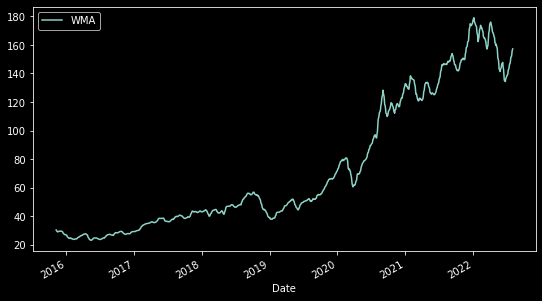

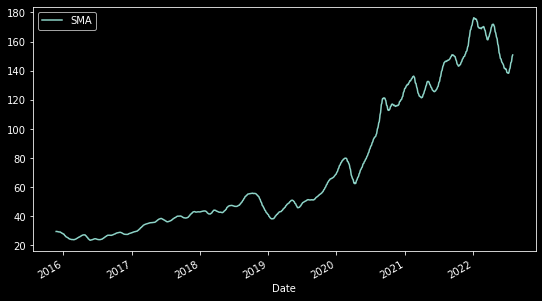

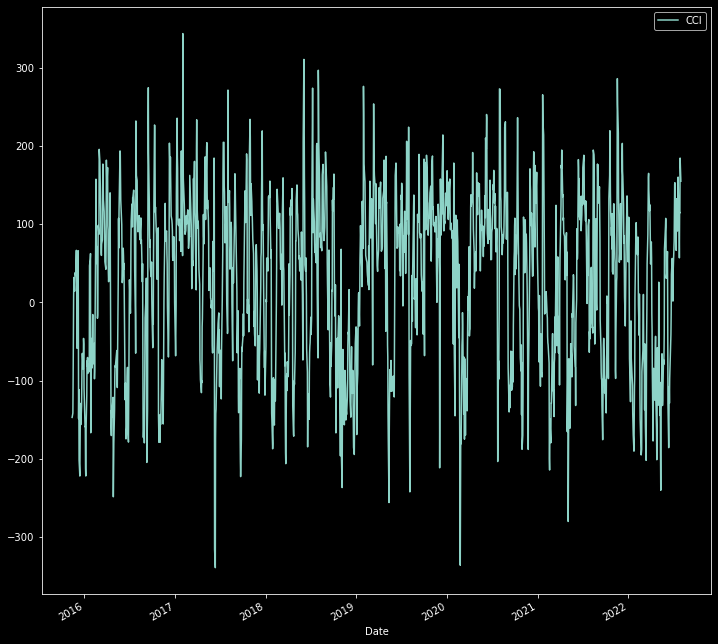

In [2]:
#---------------- TREND --------------------
#Weighted Moving Average (WMA)

trend['WMA'] = ta.wma(df['Close'])
trend[['WMA']].plot(figsize=(9,5))
plt.show()


#Simple Moving Average (SMA)
trend['SMA'] = ta.sma(df['Close'],20)
trend[['SMA']].plot(figsize=(9,5))
plt.show()


#cci(high, low, close, length=None, c=None, talib=None, offset=None, **kwargs)
#Commodity Channel Index (CCI)
trend['CCI'] = ta.cci(df['High'],df['Low'], df['Close'])
trend[['CCI']].plot(figsize=(12,12))
plt.show()

#-----------------------------------------------



In [3]:
trend.shape

(1702, 3)

In [4]:
trend = trend.replace('?', np.nan)
trend.isnull().sum()

WMA     9
SMA    19
CCI    13
dtype: int64

In [5]:
def fill_missing(values):
    one_day = 60*24
    for row in range(trend.shape[0]):
        for col in range(trend.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]

fill_missing(trend.values)
trend.isnull().sum()

WMA    0
SMA    0
CCI    0
dtype: int64

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA model with number of components desired
pca = PCA(n_components=2)
# Fit PCA model to the data and transform it
X_transformed = pca.fit_transform(trend)

# The transformed data now has only 1 features
print(X_transformed.shape)

(1702, 2)


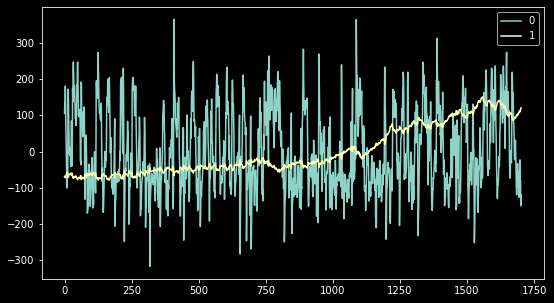

In [7]:
x = pd.DataFrame(X_transformed)
x.plot(figsize=(9,5))
plt.show()